### This notebook contains both the error analysis as the requested report.

The notebook includes a demonstration where you can try different premise/hypothesis combinations and see how the model behaves. Furthermore, a report is included containing an analysis of the experiments, results and exploring our own research question

### Notebook

#### Libraries & imports

In [14]:
import torch
import numpy as np
import sklearn.metrics

from data_preprocessing import *
from train import *
from IPython.display import Image


#### Dataset & Modelpaths

In [2]:
# Note that everythign is ran using GPU
vocabulary, _, val_loader, test_loader = data_preprocessing(batch_size = 64, root = '.data', debug = False, device = None)

[nltk_data] Downloading package punkt to /home/j.chu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


split retrieved. it took 126.6578516960144
Getting vocab...


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
MODEL_PATHS = {"AWE":"checkpoints/Baseline.pt",
    "LSTM":"checkpoints/uniLSTM.pt",
    "BiLSTM":"checkpoints/BLSTM.pt",
    "BiLSTMMax":"checkpoints/BLSTMMax.pt"}

#### Results

In [5]:
# Initialize all the models
baseline = NLINet(encoder_name='Baseline', vocab=vocabulary).to(device)
lstm = NLINet(encoder_name='uniLSTM', vocab=vocabulary).to(device)
bilstm = NLINet(encoder_name='BLSTM', vocab=vocabulary).to(device)
bilstmmax = NLINet(encoder_name='BLSTMMax', vocab=vocabulary).to(device)

# load state dicts
baseline.load_state_dict(torch.load(MODEL_PATHS["AWE"])["model_state_dict"])
lstm.load_state_dict(torch.load(MODEL_PATHS["LSTM"])["model_state_dict"])
bilstm.load_state_dict(torch.load(MODEL_PATHS["BiLSTM"])["model_state_dict"])
bilstmmax.load_state_dict(torch.load(MODEL_PATHS["BiLSTMMax"])["model_state_dict"])






<All keys matched successfully>

#### AWE 

In [10]:
test_acc, _ = eval_model(baseline, test_loader, device)
val_acc, _ = eval_model(baseline, val_loader, device)

print(f"Baseline results: test accuracy = {test_acc:.3f}, validation accuracy = {val_acc:.3f}")

Baseline results: test accuracy = 0.678, validation accuracy = 0.680


#### LSTM

In [11]:
test_acc, _ = eval_model(lstm, test_loader, device)
val_acc, _ = eval_model(lstm, val_loader, device)
print(f"LSTM results: test accuracy = {test_acc:.3f}, validation accuracy = {val_acc:.3f}")

LSTM results: test accuracy = 0.810, validation accuracy = 0.810


#### BiLSTM

In [12]:
test_acc, _ = eval_model(bilstm, test_loader, device)
val_acc, _ = eval_model(bilstm, val_loader, device)
print(f"BiLSTM results: test accuracy = {test_acc:.3f}, validation accuracy = {val_acc:.3f}")

BiLSTM results: test accuracy = 0.810, validation accuracy = 0.814


#### BiLSTM Max

In [13]:
test_acc, _ = eval_model(bilstmmax, test_loader, device)
val_acc, _ = eval_model(bilstmmax, val_loader, device)
print(f"BiLSTM Max results: test accuracy = {test_acc:.3f}, validation accuracy = {val_acc:.3f}")

BiLSTM Max results: test accuracy = 0.846, validation accuracy = 0.847


#### Tensorboard training/validation loss and accuracies

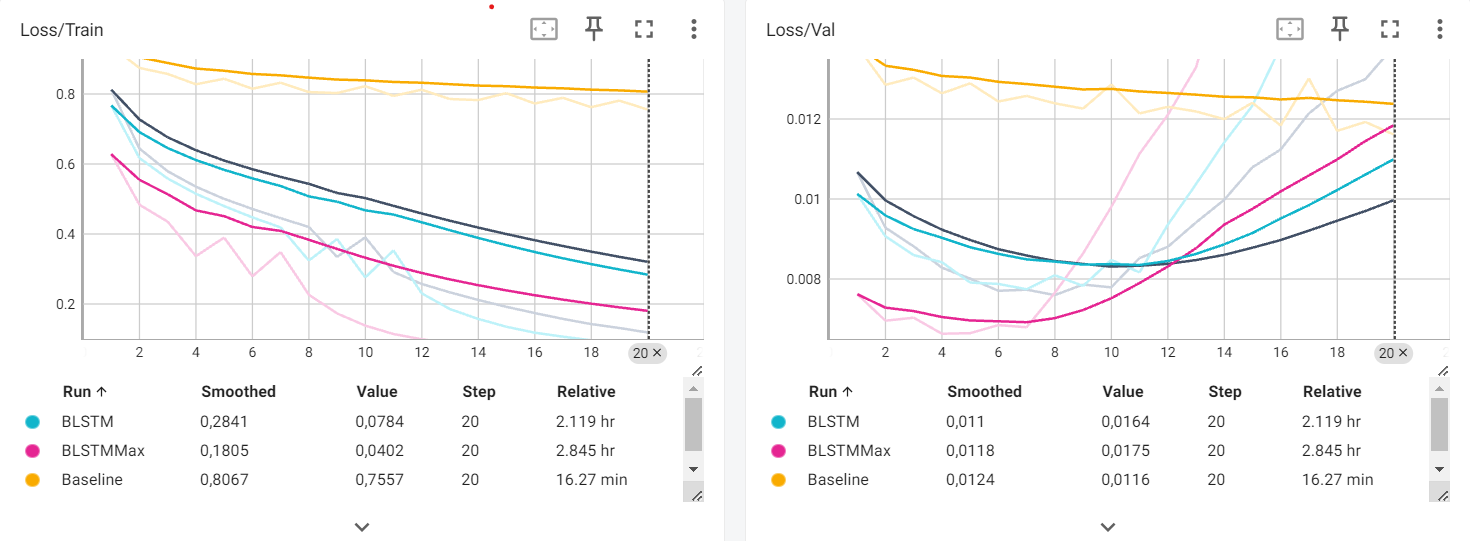

In [19]:
image_path = "images/losses.png"
Image(filename=image_path)

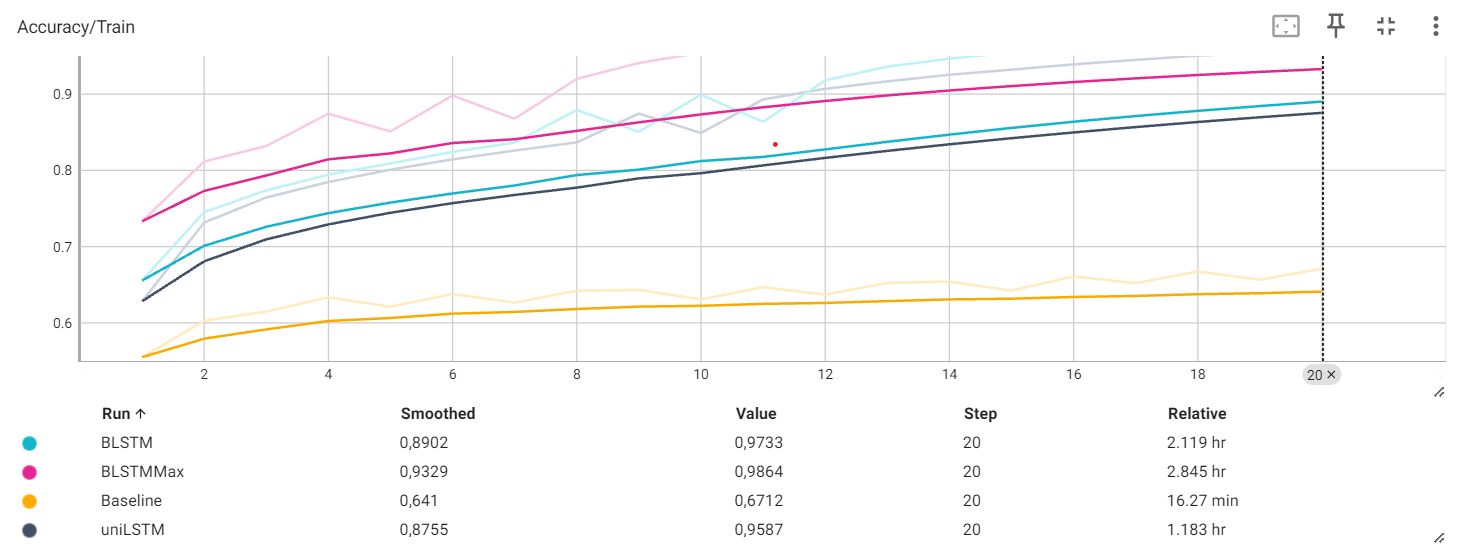

In [20]:
image_path = "images/train_accuracy.png"
Image(filename=image_path)

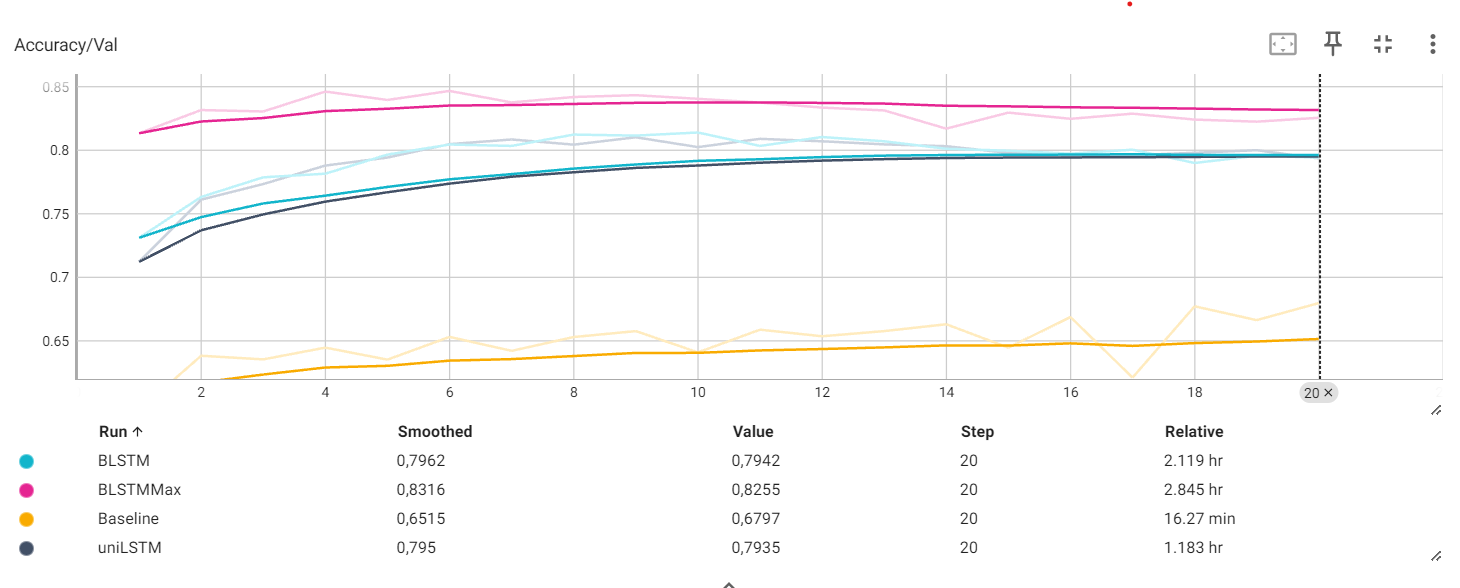

In [21]:
image_path = "images/validation_accuracy.png"
Image(filename=image_path)

#### Result Analysis (Answering questions of the report)

In this practical replication study of sentence representation models for natural language inference (NLI), we experimented with four different architectures: Average Word Embeddings (AWE), Long Short-Term Memory (LSTM), Bidirectional LSTM (BiLSTM), and BiLSTM with Max Pooling (BiLSTMMax). The test accuracies observed were as follows:

AWE: 67.8%
LSTM: 81.0%
BiLSTM: 81.0%
BiLSTMMax: 84.6%

##### Model Performance Analysis
AWE (67.8%):
AWE is the simplest model among those tested. It creates sentence embeddings by averaging the embeddings of all words in a sentence. This model's lower performance can be attributed to its inability to account for word order and syntactic structure, which are crucial in understanding sentence meanings. Furthermore, averaging word embeddings dilutes the significance of each word, particularly when sentences contain words with opposing sentiments or meanings.

LSTM (81.0%):
The LSTM model shows a significant performance increase over AWE. LSTMs are capable of capturing sequential information, thus preserving some aspects of word order and syntax. This characteristic allows LSTMs to better model the context around each word, leading to more informed sentence representations that can improve performance on tasks like NLI.

BiLSTM (81.0%):
BiLSTM extends the LSTM by processing the sentence in both forward and reverse directions, capturing context from both sides. Surprisingly, the BiLSTM did not outperform the unidirectional LSTM in our tests. This might be due to the nature of our dataset, where the context on either side of a word may contribute equally to the meaning of the sentence, or due to the BiLSTM requiring more data or training time to fully realize its advantage over unidirectional LSTM.

BiLSTMMax (84.6%):
BiLSTMMax, which enhances the BiLSTM with max pooling, achieved the highest accuracy in our experiments. Max pooling helps the model to capture the most salient features in a sentence, effectively highlighting key words or phrases that are crucial for understanding the sentence's meaning. This capability likely explains its superior performance, as it can better differentiate between sentences that are similar in structure but differ in meaning due to the presence of certain keywords.

##### Error Analysis 
Where models fail can often be attributed to several factors. Simpler models like AWE might struggle with sentences that contain negations, homonyms, or words with multiple meanings. They may also fail to recognize the importance of key phrases or the implications of certain words due to their averaging approach. LSTMs and BiLSTMs might fail in cases where sophisticated logical reasoning or world knowledge is required, which is beyond the scope of patterns learnable from the training data alone.

BiLSTM and BiLSTMMax models may fail in cases that require understanding beyond syntactic cues, such as sarcasm, metaphor, or complex implications not explicitly stated in the text. Despite their ability to capture bidirectional context, these models are limited by the representational power of their embeddings and the depth of their layers.

##### Sentence Embedding Information Representation
Sentence embeddings aim to encapsulate the semantic meaning of a sentence into a dense vector. While these embeddings can capture syntactic structure and some semantic information, they can also lose subtleties such as tone, register, and nuanced meaning conveyed by specific word choices and combinations. Models like AWE lose word order entirely, while LSTMs preserve it to some extent. BiLSTMs and BiLSTMMax improve upon this by considering the context from both directions, but even they may not fully capture complex relational dynamics between parts of a sentence.

The effectiveness of sentence embeddings in representing meaning is directly tied to the model's architecture. Simpler models like AWE may lose critical information, whereas models with max pooling operations, such as BiLSTMMax, are better at retaining the most salient features of the input sentences.

#### Answering Examples Questions

#### Going through the examples using Baseline model

In [63]:
idx_label = {0: 'entailment', 1: "neutral", 2: "contradiction"}

In [61]:
model = baseline

p = 'Two men sitting in the sun'
h = 'Nobody is sitting in the shade'

# tokenize premise and hyptothesis and stoi
p = torch.tensor([vocabulary.stoi[x] for x in tokenize_en(p)]).to(device).unsqueeze(0)
h = torch.tensor([vocabulary.stoi[x] for x in tokenize_en(h)]).to(device).unsqueeze(0)
# print(p)
p_length = torch.tensor([len(p)]).to(device)
# print(p_length)
h_length = torch.tensor([len(h)]).to(device)
preds = model((p, p_length), (h, h_length))
predicted_label = torch.argmax(preds, dim=1)
print("predicted label using baseline model for first example: ", idx_label[predicted_label.cpu().item()])



predicted label using baseline model for first example:  contradiction


In [64]:
p = 'A man is walking a dog'
h = 'No cat is outside'

# tokenize premise and hyptothesis and stoi
p = torch.tensor([vocabulary.stoi[x] for x in tokenize_en(p)]).to(device).unsqueeze(0)
h = torch.tensor([vocabulary.stoi[x] for x in tokenize_en(h)]).to(device).unsqueeze(0)
# print(p)
p_length = torch.tensor([len(p)]).to(device)
# print(p_length)
h_length = torch.tensor([len(h)]).to(device)
preds = model((p, p_length), (h, h_length))
predicted_label = torch.argmax(preds, dim=1)
print("predicted label using baseline model: ", idx_label[predicted_label.cpu().item()])

predicted label using baseline model:  neutral


#### Going through the examples using BiLSTM Max model

In [ ]:
model = bilstmmax

In [65]:
p = 'Two men sitting in the sun'
h = 'Nobody is sitting in the shade'

# tokenize premise and hyptothesis and stoi
p = torch.tensor([vocabulary.stoi[x] for x in tokenize_en(p)]).to(device).unsqueeze(0)
h = torch.tensor([vocabulary.stoi[x] for x in tokenize_en(h)]).to(device).unsqueeze(0)
# print(p)
p_length = torch.tensor([len(p)]).to(device)
# print(p_length)
h_length = torch.tensor([len(h)]).to(device)
preds = model((p, p_length), (h, h_length))
predicted_label = torch.argmax(preds, dim=1)
print("predicted label using baseline model for first example: ", idx_label[predicted_label.cpu().item()])



predicted label using baseline model for first example:  contradiction


In [66]:
p = 'A man is walking a dog'
h = 'No cat is outside'

# tokenize premise and hyptothesis and stoi
p = torch.tensor([vocabulary.stoi[x] for x in tokenize_en(p)]).to(device).unsqueeze(0)
h = torch.tensor([vocabulary.stoi[x] for x in tokenize_en(h)]).to(device).unsqueeze(0)
# print(p)
p_length = torch.tensor([len(p)]).to(device)
# print(p_length)
h_length = torch.tensor([len(h)]).to(device)
preds = model((p, p_length), (h, h_length))
predicted_label = torch.argmax(preds, dim=1)
print("predicted label using baseline model: ", idx_label[predicted_label.cpu().item()])

predicted label using baseline model:  neutral


#### Answering why the model would fail in such cases

For both our simplest model AWE and most complex model BiLSTMMax, we see that for example 1 the prediction is incorrect and for example 2 the prediction is correct. The reason why models could fail for example one is that understanding that if "two men are sitting in the sun," it doesn't necessarily mean "nobody is sitting in the shade," requires an understanding of physical space and human behavior not explicit in the text. Moreover, due to negations "nobody" and "no cat" the models might have a hard time understanding the true meaning of the sentence as this can is challenging for NLI models to capture. Finally, there are certain contradictions in the hypotheses premises pairs that naturally are opposities "sun - shade", "cat - dog", this might cause the model to focus on this and put more weight in predicting a contradiction.

### Demonstration

In [74]:
# Choose your model and premise
model = bilstmmax
p = 'the boat has a big hole'
h = 'the boat is filling up with water'
label = 'entailment'

In [75]:
# tokenize premise and hyptothesis and stoi
p = torch.tensor([vocabulary.stoi[x] for x in tokenize_en(p)]).to(device).unsqueeze(0)
h = torch.tensor([vocabulary.stoi[x] for x in tokenize_en(h)]).to(device).unsqueeze(0)
# print(p)
p_length = torch.tensor([len(p)]).to(device)
# print(p_length)
h_length = torch.tensor([len(h)]).to(device)
preds = model((p, p_length), (h, h_length))
predicted_label = torch.argmax(preds, dim=1)
print("predicted label: ", idx_label[predicted_label.cpu().item()])
print("true label: ", label)

if label == idx_label[predicted_label.cpu().item()]:
    print("Yay correct")
    


predicted label:  entailment
true label:  entailment
Yay correct
